In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [2]:
tweets = pd.read_csv('all_tweets.csv')
print("Tweets Shape :", tweets.shape)
tweets.head()

Tweets Shape : (11356, 6)


,id,Date,Likes,RTs,tweet,length
0,1331422647054438401,2020-11-25 02:21:10,1,0,"I don't even remember if I sent Bernie money, but I fucking remember sending Amy some dough. I'm...",124
1,1331422174947774472,2020-11-25 02:19:17,2,0,"""Wally, are you being hyperbolic?""\n\nNo. I'm a hardcore lefty who donated to Amy Klobuchar beca...",277
2,1331421339668914178,2020-11-25 02:15:58,2,0,Another break from my trademark negativity: Biden's press conference are boring. They contain li...,268
3,1331375261594611713,2020-11-24 23:12:52,0,0,"@robbystarbuck @realDonaldTrump Biden got more votes. \n\nYou do realize that, right? Or are you...",110
4,1331374771997732869,2020-11-24 23:10:56,1,0,"Taking a break from my trademark negativity about [checks notes] well, everything: Biden elevati...",166


In [3]:
tweets.duplicated().sum()

1732

In [32]:
# Vérifier qu'il ya des données manquantes ==> Pas des données manquantes
print("Est-ce qu'il ya des données manquantes ?",tweets.isna().any().any())
tweets.info()

Est-ce qu'il ya des données manquantes ? False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9624 entries, 0 to 9623
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      9624 non-null   int64         
 1   Date    9624 non-null   datetime64[ns]
 2   Likes   9624 non-null   int64         
 3   RTs     9624 non-null   int64         
 4   tweet   9624 non-null   object        
 5   length  9624 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 451.2+ KB


## Pretraitement des tweets

In [27]:
# Supprimer les lignes dupliquées
tweets = tweets.drop_duplicates().reset_index(drop=True)

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#Removing URLs from tweets,Converting all tweets to lowercase,Removing punctuations and number
def remove_noise(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('http\S+','',text)
    text = re.sub('\n+','',text)
    #text = re.split('\W+', text)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    emoji_pattern.sub(r'', text)
    text = ''.join(i for i in text if not i.isdigit())#remove number
   
    text= text.lower()
    return text

tweets['tweet'] = tweets['tweet'].apply(lambda x: remove_noise(x))
tweets.head(10)


,id,Date,Likes,RTs,tweet,length
0,1331422647054438401,2020-11-25 02:21:10,1,0,i dont even remember if i sent bernie money but i fucking remember sending amy some dough im lik...,124
1,1331422174947774472,2020-11-25 02:19:17,2,0,wally are you being hyperbolicno im a hardcore lefty who donated to amy klobuchar because she do...,277
2,1331421339668914178,2020-11-25 02:15:58,2,0,another break from my trademark negativity bidens press conference are boring they contain littl...,268
3,1331375261594611713,2020-11-24 23:12:52,0,0,robbystarbuck realdonaldtrump biden got more votes you do realize that right or are you fucking ...,110
4,1331374771997732869,2020-11-24 23:10:56,1,0,taking a break from my trademark negativity about checks notes well everything biden elevating c...,166
5,1330590942676602880,2020-11-22 19:16:16,0,1,the difference between chuck todd and other journalists who are just as crappy is that those oth...,269
6,1330590370275659776,2020-11-22 19:14:00,0,0,chuck retodd is at it again i see,62
7,1330192365978578951,2020-11-21 16:52:28,0,0,i know that we being collected under this massive tent thats called the democratic party are use...,278
8,1330191836086988802,2020-11-21 16:50:22,0,0,point taken and i cant say rebeccas point doesnt have its own validity that i cant argue against...,292
9,1329574242283884546,2020-11-19 23:56:16,1,0,there are no words to accurately express just how much of a piece of shit she is,107


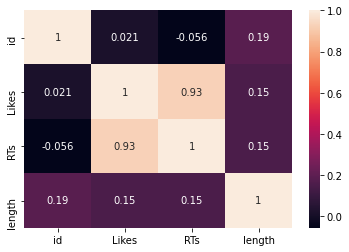

In [9]:
#calculate the correlation coefficient of each pair of variables
corr_matrix = tweets.corr()
sns.heatmap(corr_matrix, annot=True)
# ====> Likes et RTs est fortement corrélé

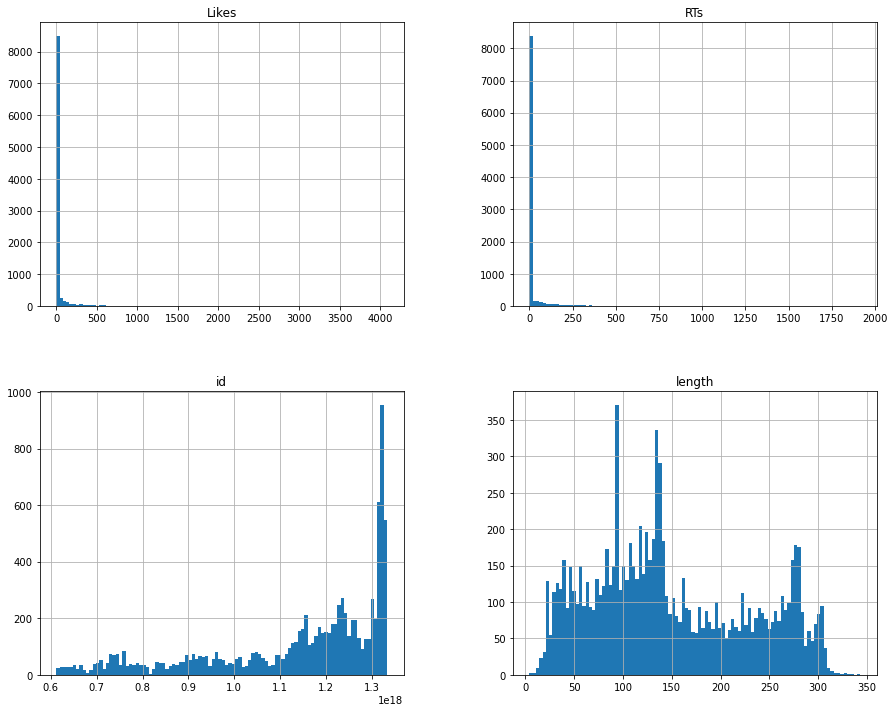

In [10]:
tweets.hist(bins=100, figsize=(15,12))
plt.show()

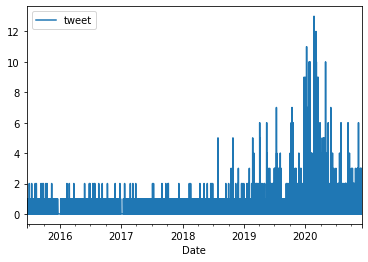

In [11]:
#Temporal frequency of tweets
tweets['Date'] = pd.to_datetime(tweets['Date'])
# plot a time series
(tweets[['Date','tweet']]
 .set_index('Date')
 # 'T' = minute
 .resample('T')
 .count()
 .rename(columns=dict(text='1-minute counts'))
 .plot()
 
);


### Data Preprocessing: Basic NLP Techniques
Créons Corpus à partir de la colonne «tweet», Corpus est une version simplifiée de nos données texte contenant des données propres. Pour créer des données, nous devons effectuer les actions suivantes

- <strong>Supprimer les mots indésirables : </strong> Suppression des mots indésirables tels que les caractères spéciaux et les nombres pour obtenir uniquement du texte pur
- <strong>Transformez les mots en minuscules : </strong>Transformez les mots en minuscules car les majuscules et les minuscules ont des codes ASCII différents
- <strong> Supprimer stopwords : </strong>Stop words sont généralement les mots les plus courants dans une langue et ils ne seront pas pertinents pour déterminer la nature
- <strong> Stemming words :</strong> Stemming est le processus de réduction des mots à leur racine, base ou forme de racine

Tokenization, Lemmatization et Supprimer stopwords

<Strong>Stopwords </Strong> sont des mots couramment utilisés dont la présence dans une phrase a moins de poids que d'autres mots. Ils comprennent des mots comme ‘and’, ‘or’, ‘has’ et.c.

<Strong> Tokenization </Strong> est le processus de division d'une chaîne en une liste de jetons. Une phrase peut être réduite en mots et un mot peut être réduit en lettres à l'aide des tokenizers appropriés.

<Strong> Lemmatization </Strong>réduit un mot à sa forme racine. Par exemple, la forme de racine des «roches» est «roche».

In [33]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
Corpus   = []
pstem = PorterStemmer()
wn = nltk.WordNetLemmatizer()

for i in range(tweets['tweet'].shape[0]):
    #Remove unwanted words
    text = re.sub("[^a-zA-Z]", ' ', tweets['tweet'][i])
    #Transform words to lowercase
    text = text.lower()
    text = text.split()
    #Remove stopwords then Stemming it and lemmatization
    text = [pstem.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = [wn.lemmatize(word) for word in text]
    text = ' '.join(text)
    #Append cleaned tweet to corpus
    Corpus .append(text)
print(Corpus [0:10])


['dont even rememb sent berni money fuck rememb send ami dough im like horribl leftist tbh', 'walli hyperbolicno im hardcor lefti donat ami klobuchar doesnt use twitter much klobuchar isnt nearli far left heart health requir le drama dc even shithead like learn compromis', 'anoth break trademark neg biden press confer bore contain littl drama noth keep pin phone exhaust wait news updat see gonna fuck die awesom four year', 'robbystarbuck realdonaldtrump biden got vote realiz right fuck stupid', 'take break trademark neg check note well everyth biden elev climat chang respons cabinet level posit good move', 'differ chuck todd journalist crappi journalist selfawar sean hanniti know exactli he chuck todd fuck idiot hasnt faintest idea he becom', 'chuck retodd see', 'know collect massiv tent that call democrat parti use defens use interparti attack need figur put side defens stori like might', 'point taken cant say rebecca point doesnt valid cant argu howev think member medium use stori li

### Il est évident que certains mots sont très moins apparus dans les tweets, nous pouvons donc supprimer ces mots de notre corpus pour réduire la dimension du modèle

### Nous allons créer un dictionnaire pour cela où «clé» fait référence à un mot et «valeur» fait référence à la fréquence de ce mot dans les tweets et la trame de données de ce dictionnaire

In [17]:
#Create dictionary 
uniqueWords = {}
for text in Corpus:
    for word in text.split():
        if(word in uniqueWords.keys()):
            uniqueWords[word] += 1
        else:
            uniqueWords[word] = 1
            
#Convert dictionary to dataFrame
uniqueWords = pd.DataFrame.from_dict(uniqueWords,orient='index',columns=['WordFrequency'])
uniqueWords.sort_values(by=['WordFrequency'], inplace=True, ascending=False)
print("Number of records in Unique Words Data frame are {}".format(len(uniqueWords)))
uniqueWords.head(10)

Number of records in Unique Words Data frame are 13846


,WordFrequency
reuter,1796
vol,1061
also,744
report,699
today,629
amp,564
us,477
trump,476
week,458
like,451


In [18]:
#Get Maximum,Minimum and Mean occurance of a word 
print("Maximum Occurance of a word is {} times".format(uniqueWords['WordFrequency'].max()))
print("Minimum Occurance of a word is {} times".format(uniqueWords['WordFrequency'].min()))
print("Mean Occurance of a word is {} times".format(uniqueWords['WordFrequency'].mean()))

Maximum Occurance of a word is 1796 times
Minimum Occurance of a word is 1 times
Mean Occurance of a word is 8.588978766430738 times


### À partir de la base de données ''uniqueWords  '', nous pouvons dire que certains mots sont répétés beaucoup et d'autres très moins répétés, nous ne pouvons conserver que les mots qui se produisent 20 fois ou plus pour que la dimension du Bag of Word

In [19]:
uniqueWords=uniqueWords[uniqueWords['WordFrequency']>=20]
print("Number of records in Unique Words Data frame are {}".format(len(uniqueWords)))

Number of records in Unique Words Data frame are 1193


### Comme vous pouvez le voir, le nombre d'enregistrements a considérablement diminué.

### Créons un Word Cloud pour notre corpus

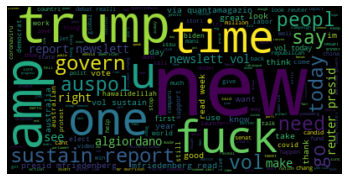

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(" ".join(Corpus))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### What is a Bag-of-Words?
A bag-of-words model, ou BoW , est un moyen d'extraire des fonctionnalités du texte à utiliser dans la modélisation, comme avec les algorithmes d'apprentissage automatique.


A bag-of-words est une représentation de texte qui décrit l'occurrence de mots dans un document. Cela implique deux choses:

- Un vocabulaire de mots connus.

- Une mesure de la présence de mots connus.


In [21]:
# Creating the Bag of Words model (Vectorization)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = len(uniqueWords))
X=cv.fit_transform(Corpus)
print(X)

  (0, 319)	1
  (0, 357)	1
  (0, 867)	2
  (0, 114)	1
  (0, 690)	1
  (0, 429)	1
  (0, 50)	1
  (0, 525)	1
  (0, 619)	1
  (1, 357)	1
  (1, 50)	1
  (1, 525)	1
  (1, 619)	1
  (1, 317)	1
  (1, 315)	1
  (1, 1113)	1
  (1, 1104)	1
  (1, 700)	1
  (1, 562)	1
  (1, 708)	1
  (1, 393)	1
  (1, 608)	1
  (1, 484)	1
  (1, 482)	1
  (1, 611)	1
  :	:
  (9620, 1146)	1
  (9620, 848)	1
  (9620, 186)	1
  (9620, 717)	1
  (9620, 551)	1
  (9620, 603)	1
  (9620, 25)	1
  (9620, 32)	1
  (9620, 859)	1
  (9620, 1048)	1
  (9620, 949)	1
  (9620, 883)	1
  (9620, 672)	1
  (9621, 773)	1
  (9621, 883)	1
  (9622, 959)	1
  (9622, 1028)	1
  (9623, 809)	1
  (9623, 990)	1
  (9623, 531)	1
  (9623, 753)	1
  (9623, 425)	1
  (9623, 334)	1
  (9623, 883)	1
  (9623, 1013)	1


## Modeling

### La plupart du temps, la méthode Elbow est utilisée avec une erreur quadratique (sse) ou dans la somme des erreurs du cluster (wcss). Dans cet exemple, j'utiliserai wcss pour trouver le nombre optimal de clusters. Le code ci-dessous est un moyen facile d'obtenir la valeur wcss pour différents nombres de clusters,

In [40]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 258893.000
Iteration  1, inertia 156436.817
Converged at iteration 1: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 246469.000
Iteration  1, inertia 156436.817
Converged at iteration 1: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 322259.000
Iteration  1, inertia 156436.817
Converged at iteration 1: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 382141.000
Iteration  1, inertia 156436.817
Converged at iteration 1: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 214963.000
Iteration  1, inertia 156436.817
Converged at iteration 1: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 213083.000
Iteration  1, inertia 156436.817
Converged at iteration 1: center shift 0.000000e+0

Initialization complete
Iteration  0, inertia 158332.000
Iteration  1, inertia 156342.100
Converged at iteration 1: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 190857.000
Iteration  1, inertia 156290.271
Iteration  2, inertia 156258.355
Iteration  3, inertia 156218.628
Iteration  4, inertia 156143.848
Iteration  5, inertia 155860.058
Iteration  6, inertia 155541.208
Iteration  7, inertia 155327.160
Iteration  8, inertia 155286.130
Iteration  9, inertia 155271.204
Iteration 10, inertia 155259.344
Iteration 11, inertia 155243.839
Iteration 12, inertia 155223.738
Iteration 13, inertia 155203.857
Iteration 14, inertia 155177.704
Iteration 15, inertia 155148.421
Iteration 16, inertia 155129.717
Iteration 17, inertia 155120.077
Iteration 18, inertia 155115.022
Iteration 19, inertia 155112.134
Iteration 20, inertia 155111.391
Iteration 21, inertia 155111.151
Iteration 22, inertia 155110.928
Iteration 23, inertia 155110.785
Iteration 24

Iteration  0, inertia 198606.000
Iteration  1, inertia 156024.677
Iteration  2, inertia 155832.048
Iteration  3, inertia 155555.780
Iteration  4, inertia 155323.454
Iteration  5, inertia 155181.953
Iteration  6, inertia 155094.586
Iteration  7, inertia 155063.164
Iteration  8, inertia 155054.158
Iteration  9, inertia 155051.696
Iteration 10, inertia 155050.633
Iteration 11, inertia 155050.054
Iteration 12, inertia 155049.975
Iteration 13, inertia 155049.963
Converged at iteration 13: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 191953.000
Iteration  1, inertia 155869.440
Iteration  2, inertia 155373.040
Iteration  3, inertia 154397.024
Iteration  4, inertia 154033.827
Iteration  5, inertia 153996.616
Iteration  6, inertia 153996.552
Converged at iteration 6: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 192037.000
Iteration  1, inertia 156101.458
Iteration  2, inertia 155925

Iteration 22, inertia 154893.397
Iteration 23, inertia 154893.234
Iteration 24, inertia 154893.063
Converged at iteration 24: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 242956.000
Iteration  1, inertia 153532.461
Iteration  2, inertia 152056.881
Iteration  3, inertia 151024.884
Iteration  4, inertia 150764.653
Iteration  5, inertia 150684.121
Iteration  6, inertia 150655.381
Iteration  7, inertia 150644.636
Iteration  8, inertia 150638.165
Iteration  9, inertia 150634.147
Iteration 10, inertia 150626.663
Iteration 11, inertia 150590.226
Iteration 12, inertia 150471.633
Iteration 13, inertia 150245.685
Iteration 14, inertia 150170.487
Iteration 15, inertia 150115.579
Iteration 16, inertia 150088.733
Iteration 17, inertia 150045.197
Iteration 18, inertia 150040.579
Iteration 19, inertia 150040.416
Converged at iteration 19: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 18075

Iteration  0, inertia 213205.000
Iteration  1, inertia 154211.223
Iteration  2, inertia 152809.650
Iteration  3, inertia 152472.978
Iteration  4, inertia 152423.041
Iteration  5, inertia 152403.519
Iteration  6, inertia 152395.383
Iteration  7, inertia 152382.196
Iteration  8, inertia 152373.357
Iteration  9, inertia 152366.166
Iteration 10, inertia 152359.138
Iteration 11, inertia 152346.290
Iteration 12, inertia 152335.858
Iteration 13, inertia 152326.250
Iteration 14, inertia 152313.188
Iteration 15, inertia 152295.863
Iteration 16, inertia 152279.065
Iteration 17, inertia 152269.659
Iteration 18, inertia 152264.945
Iteration 19, inertia 152262.682
Iteration 20, inertia 152260.689
Iteration 21, inertia 152259.391
Iteration 22, inertia 152258.827
Iteration 23, inertia 152258.634
Iteration 24, inertia 152258.469
Iteration 25, inertia 152258.162
Iteration 26, inertia 152258.002
Iteration 27, inertia 152257.922
Iteration 28, inertia 152257.805
Iteration 29, inertia 152257.724
Iteration 

Iteration  0, inertia 167804.000
Iteration  1, inertia 154494.099
Iteration  2, inertia 153276.025
Iteration  3, inertia 153041.343
Iteration  4, inertia 152902.373
Iteration  5, inertia 152818.033
Iteration  6, inertia 152770.784
Iteration  7, inertia 152742.258
Iteration  8, inertia 152728.422
Iteration  9, inertia 152727.889
Iteration 10, inertia 152727.664
Iteration 11, inertia 152727.545
Iteration 12, inertia 152727.506
Iteration 13, inertia 152727.461
Converged at iteration 13: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 211560.000
Iteration  1, inertia 153520.327
Iteration  2, inertia 151690.799
Iteration  3, inertia 150862.030
Iteration  4, inertia 150393.699
Iteration  5, inertia 150209.479
Iteration  6, inertia 150023.530
Iteration  7, inertia 149902.561
Iteration  8, inertia 149860.514
Iteration  9, inertia 149839.586
Iteration 10, inertia 149812.618
Iteration 11, inertia 149802.183
Iteration 12, inertia 149798.556
It

Iteration 23, inertia 149518.283
Iteration 24, inertia 149517.827
Iteration 25, inertia 149517.370
Iteration 26, inertia 149516.509
Iteration 27, inertia 149516.197
Converged at iteration 27: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 180306.000
Iteration  1, inertia 154785.278
Iteration  2, inertia 153921.932
Iteration  3, inertia 152845.299
Iteration  4, inertia 152269.225
Iteration  5, inertia 152047.085
Iteration  6, inertia 151957.734
Iteration  7, inertia 151927.213
Iteration  8, inertia 151887.778
Iteration  9, inertia 151872.770
Iteration 10, inertia 151864.669
Iteration 11, inertia 151829.187
Iteration 12, inertia 151807.089
Iteration 13, inertia 151797.355
Iteration 14, inertia 151793.505
Iteration 15, inertia 151792.352
Iteration 16, inertia 151791.383
Iteration 17, inertia 151791.242
Iteration 18, inertia 151791.107
Iteration 19, inertia 151791.088
Converged at iteration 19: center shift 0.000000e+00 within toleranc

Iteration  1, inertia 153953.089
Iteration  2, inertia 152695.613
Iteration  3, inertia 152315.563
Iteration  4, inertia 152167.678
Iteration  5, inertia 152057.017
Iteration  6, inertia 151932.776
Iteration  7, inertia 151796.021
Iteration  8, inertia 151689.849
Iteration  9, inertia 151623.368
Iteration 10, inertia 151600.946
Iteration 11, inertia 151594.530
Iteration 12, inertia 151590.911
Iteration 13, inertia 151588.782
Iteration 14, inertia 151587.523
Iteration 15, inertia 151586.104
Iteration 16, inertia 151584.621
Iteration 17, inertia 151582.984
Iteration 18, inertia 151582.249
Iteration 19, inertia 151581.781
Iteration 20, inertia 151581.479
Iteration 21, inertia 151581.211
Iteration 22, inertia 151581.163
Iteration 23, inertia 151581.148
Iteration 24, inertia 151581.085
Iteration 25, inertia 151581.065
Iteration 26, inertia 151581.050
Converged at iteration 26: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 195253.000
It

Iteration  6, inertia 150052.847
Iteration  7, inertia 150039.589
Iteration  8, inertia 150025.419
Iteration  9, inertia 150013.516
Iteration 10, inertia 149946.840
Iteration 11, inertia 149862.607
Iteration 12, inertia 149714.362
Iteration 13, inertia 149635.624
Iteration 14, inertia 149631.646
Iteration 15, inertia 149631.328
Iteration 16, inertia 149631.009
Iteration 17, inertia 149630.541
Iteration 18, inertia 149630.386
Converged at iteration 18: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 156767.000
Iteration  1, inertia 154344.533
Iteration  2, inertia 153127.511
Iteration  3, inertia 152758.104
Iteration  4, inertia 152646.467
Iteration  5, inertia 152596.262
Iteration  6, inertia 152562.833
Iteration  7, inertia 152551.785
Iteration  8, inertia 152543.848
Iteration  9, inertia 152539.355
Iteration 10, inertia 152538.024
Iteration 11, inertia 152537.633
Iteration 12, inertia 152537.558
Converged at iteration 12: center s

Iteration 25, inertia 147400.844
Iteration 26, inertia 147400.050
Iteration 27, inertia 147399.797
Iteration 28, inertia 147398.220
Iteration 29, inertia 147371.190
Iteration 30, inertia 147305.906
Iteration 31, inertia 147299.635
Iteration 32, inertia 147298.344
Iteration 33, inertia 147298.122
Converged at iteration 33: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 168734.000
Iteration  1, inertia 154948.159
Iteration  2, inertia 152756.933
Iteration  3, inertia 151599.342
Iteration  4, inertia 150670.326
Iteration  5, inertia 149958.932
Iteration  6, inertia 149930.461
Iteration  7, inertia 149917.520
Iteration  8, inertia 149901.573
Iteration  9, inertia 149886.098
Iteration 10, inertia 149818.994
Iteration 11, inertia 149733.006
Iteration 12, inertia 149588.259
Iteration 13, inertia 149513.431
Iteration 14, inertia 149510.608
Iteration 15, inertia 149509.756
Iteration 16, inertia 149509.470
Iteration 17, inertia 149509.123
It

Iteration 22, inertia 148435.281
Iteration 23, inertia 148434.336
Iteration 24, inertia 148433.874
Iteration 25, inertia 148433.524
Iteration 26, inertia 148433.155
Converged at iteration 26: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 179732.000
Iteration  1, inertia 154193.087
Iteration  2, inertia 153291.406
Iteration  3, inertia 152236.082
Iteration  4, inertia 151521.754
Iteration  5, inertia 151089.890
Iteration  6, inertia 150949.604
Iteration  7, inertia 150870.234
Iteration  8, inertia 150763.510
Iteration  9, inertia 150743.817
Iteration 10, inertia 150735.684
Iteration 11, inertia 150702.508
Iteration 12, inertia 150680.004
Iteration 13, inertia 150669.283
Iteration 14, inertia 150666.301
Iteration 15, inertia 150664.097
Iteration 16, inertia 150662.875
Iteration 17, inertia 150661.470
Iteration 18, inertia 150660.695
Iteration 19, inertia 150660.651
Iteration 20, inertia 150660.639
Converged at iteration 20: center s

Iteration 36, inertia 150367.745
Iteration 37, inertia 150366.262
Iteration 38, inertia 150365.009
Iteration 39, inertia 150363.594
Iteration 40, inertia 150362.953
Iteration 41, inertia 150361.874
Iteration 42, inertia 150361.418
Iteration 43, inertia 150361.035
Iteration 44, inertia 150360.864
Converged at iteration 44: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 156194.000
Iteration  1, inertia 153367.005
Iteration  2, inertia 152116.295
Iteration  3, inertia 151719.999
Iteration  4, inertia 151473.120
Iteration  5, inertia 151142.484
Iteration  6, inertia 150806.020
Iteration  7, inertia 150464.183
Iteration  8, inertia 149846.807
Iteration  9, inertia 149521.058
Iteration 10, inertia 149500.588
Iteration 11, inertia 149496.545
Iteration 12, inertia 149495.443
Iteration 13, inertia 149494.680
Iteration 14, inertia 149493.979
Iteration 15, inertia 149493.457
Iteration 16, inertia 149492.964
Iteration 17, inertia 149492.257
It

Iteration 13, inertia 153427.783
Iteration 14, inertia 153427.646
Iteration 15, inertia 153427.631
Iteration 16, inertia 153427.609
Converged at iteration 16: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 157062.000
Iteration  1, inertia 153825.269
Iteration  2, inertia 152808.089
Iteration  3, inertia 151845.309
Iteration  4, inertia 150929.683
Iteration  5, inertia 150837.639
Iteration  6, inertia 150744.815
Iteration  7, inertia 150582.972
Iteration  8, inertia 150366.565
Iteration  9, inertia 150189.601
Iteration 10, inertia 150143.310
Iteration 11, inertia 150119.520
Iteration 12, inertia 150109.532
Iteration 13, inertia 150105.295
Iteration 14, inertia 150103.881
Iteration 15, inertia 150102.810
Iteration 16, inertia 150102.259
Iteration 17, inertia 150101.952
Iteration 18, inertia 150101.835
Iteration 19, inertia 150101.635
Iteration 20, inertia 150101.540
Iteration 21, inertia 150101.453
Iteration 22, inertia 150101.344
It

Iteration 12, inertia 151187.151
Iteration 13, inertia 151187.097
Iteration 14, inertia 151187.090
Converged at iteration 14: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 156968.000
Iteration  1, inertia 153732.372
Iteration  2, inertia 152715.181
Iteration  3, inertia 151752.421
Iteration  4, inertia 150836.740
Iteration  5, inertia 150744.667
Iteration  6, inertia 150651.800
Iteration  7, inertia 150489.882
Iteration  8, inertia 150273.409
Iteration  9, inertia 150096.428
Iteration 10, inertia 150051.211
Iteration 11, inertia 150027.468
Iteration 12, inertia 150017.859
Iteration 13, inertia 150013.409
Iteration 14, inertia 150011.921
Iteration 15, inertia 150010.885
Iteration 16, inertia 150010.178
Iteration 17, inertia 150009.865
Iteration 18, inertia 150009.756
Iteration 19, inertia 150009.649
Converged at iteration 19: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 15580

Iteration  2, inertia 152646.644
Iteration  3, inertia 151684.543
Iteration  4, inertia 150774.496
Iteration  5, inertia 150686.064
Iteration  6, inertia 150613.047
Iteration  7, inertia 150453.158
Iteration  8, inertia 150225.325
Iteration  9, inertia 150036.414
Iteration 10, inertia 149984.657
Iteration 11, inertia 149961.781
Iteration 12, inertia 149953.277
Iteration 13, inertia 149949.654
Iteration 14, inertia 149948.240
Iteration 15, inertia 149946.736
Iteration 16, inertia 149946.054
Iteration 17, inertia 149945.801
Iteration 18, inertia 149945.693
Converged at iteration 18: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 155736.000
Iteration  1, inertia 152036.799
Iteration  2, inertia 150415.925
Iteration  3, inertia 149676.950
Iteration  4, inertia 148606.802
Iteration  5, inertia 148328.224
Iteration  6, inertia 148260.057
Iteration  7, inertia 148162.007
Iteration  8, inertia 148101.142
Iteration  9, inertia 148061.289
It

Iteration  0, inertia 156760.000
Iteration  1, inertia 153525.483
Iteration  2, inertia 152510.673
Iteration  3, inertia 151537.878
Iteration  4, inertia 150642.103
Iteration  5, inertia 150554.128
Iteration  6, inertia 150481.117
Iteration  7, inertia 150321.201
Iteration  8, inertia 150093.348
Iteration  9, inertia 149904.401
Iteration 10, inertia 149852.617
Iteration 11, inertia 149829.733
Iteration 12, inertia 149821.224
Iteration 13, inertia 149817.602
Iteration 14, inertia 149816.182
Iteration 15, inertia 149814.675
Iteration 16, inertia 149813.992
Iteration 17, inertia 149813.736
Iteration 18, inertia 149813.628
Converged at iteration 18: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 155602.000
Iteration  1, inertia 151904.340
Iteration  2, inertia 150283.401
Iteration  3, inertia 149544.399
Iteration  4, inertia 148474.317
Iteration  5, inertia 148195.629
Iteration  6, inertia 148127.455
Iteration  7, inertia 148029.399
It

Iteration  0, inertia 156714.000
Iteration  1, inertia 153475.947
Iteration  2, inertia 152463.757
Iteration  3, inertia 151514.225
Iteration  4, inertia 150594.749
Iteration  5, inertia 150505.748
Iteration  6, inertia 150432.739
Iteration  7, inertia 150272.824
Iteration  8, inertia 150044.971
Iteration  9, inertia 149856.021
Iteration 10, inertia 149804.237
Iteration 11, inertia 149781.354
Iteration 12, inertia 149772.845
Iteration 13, inertia 149769.222
Iteration 14, inertia 149767.802
Iteration 15, inertia 149766.295
Iteration 16, inertia 149765.613
Iteration 17, inertia 149765.356
Iteration 18, inertia 149765.248
Converged at iteration 18: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 155500.000
Iteration  1, inertia 151634.777
Iteration  2, inertia 150238.514
Iteration  3, inertia 149482.926
Iteration  4, inertia 148403.348
Iteration  5, inertia 148128.673
Iteration  6, inertia 148057.938
Iteration  7, inertia 147958.849
It

Iteration  0, inertia 155831.000
Iteration  1, inertia 153491.442
Iteration  2, inertia 153020.284
Iteration  3, inertia 152491.767
Iteration  4, inertia 151920.870
Iteration  5, inertia 151654.776
Iteration  6, inertia 151409.373
Iteration  7, inertia 151188.537
Iteration  8, inertia 150956.453
Iteration  9, inertia 150356.680
Iteration 10, inertia 149790.387
Iteration 11, inertia 149787.229
Converged at iteration 11: center shift 0.000000e+00 within tolerance 9.962176e-08
Initialization complete
Iteration  0, inertia 156618.000
Iteration  1, inertia 153381.282
Iteration  2, inertia 152368.994
Iteration  3, inertia 151419.555
Iteration  4, inertia 150500.041
Iteration  5, inertia 150411.025
Iteration  6, inertia 150337.976
Iteration  7, inertia 150178.244
Iteration  8, inertia 149953.518
Iteration  9, inertia 149763.769
Iteration 10, inertia 149711.493
Iteration 11, inertia 149688.687
Iteration 12, inertia 149680.216
Iteration 13, inertia 149676.677
Iteration 14, inertia 149675.110
It

### wcss est la somme de la distance de chaque cluster entre ces clusters spécifiques, chacun pointant contre le centre de gravité du cluster. Regardez l'image ci-dessous pour comprendre, comment calculer la valeur wcss pour 3 ensembles de données de cluster,

### Donc, si nous traçons la valeur wcss par rapport au nombre de clusters que nous avons essayé d'obtenir cette valeur wcss, nous finissons normalement par obtenir un graphique similaire à celui ci-dessous,

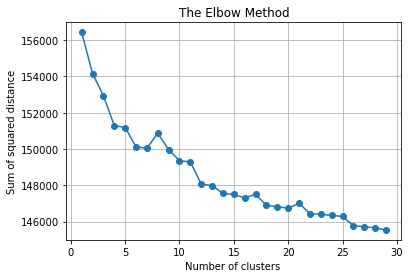

In [30]:
plt.plot(range(1,30),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel(r'Number of clusters ')
plt.ylabel('Sum of squared distance');
plt.savefig('elbow.png')
plt.grid(True)
plt.show()

### La recherche du nombre optimal de clusters à l'aide du coude du graphique est appelée <Strong> méthode Elbow.</Strong>

In [41]:
true_k=30
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
#pred_y=model.fit_predict(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=30, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
print("========Top Terms per Cluster========")

# We look at 5 the clusters generated by k-means.
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms=cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d :" %i)
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind]),
        print
        
print("\n")

========Top Terms per Cluster========
Cluster 0 :
attack
shitti
one
blasio
demdeb
without
de
almost
trick
bill
Cluster 1 :
trump
fuck
like
biden
democrat
get
im
peopl
vote
want
Cluster 2 :
reuter
read
week
mfriedenberg
presid
here
journal
look
technolog
innov
Cluster 3 :
year
new
reveal
specialreport
reuter
stori
coupl
enterpris
report
marri
Cluster 4 :
reuter
speed
histori
fastandfirst
first
world
read
year
fall
nearli
Cluster 5 :
republican
trump
put
who
pact
would
run
escal
back
caus
Cluster 6 :
support
moder
mani
hillari
ask
democrat
could
like
need
term
Cluster 7 :
week
loss
progress
presid
seahawk
reuter
season
read
soleimani
ai
Cluster 8 :
world
journalist
wpfd
trust
pressfreedom
around
thankyoujournalist
work
news
bring
Cluster 9 :
shake
refus
hand
democrat
ann
also
richard
berni
warren
partli
Cluster 10 :
orgphys
america
nasa
come
googl
light
like
north
india
look
Cluster 11 :
vol
also
today
report
govern
sustain
via
auspol
amp
like
Cluster 12 :
reuter
report
us
join
news
disc

In [34]:

i=0
j=0
while i<29:
    while True: 
        Y=cv.transform([Corpus[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("tweet of cluster " +str(prediction)+ ":"+tweets.loc[j,"tweet"])    
            print('=========================================================')
            j=0
            break
        j+=1
    i+=1
    



tweet of cluster [0]:i dont even remember if i sent bernie money but i fucking remember sending amy some dough im like a horrible leftist tbh
tweet of cluster [1]:taking a break from my trademark negativity about checks notes well everything biden elevating climate change response to a cabinet level position is a good move
tweet of cluster [2]:happening in one hour reuters virtual newsmaker discussion on how the pandemic is reshaping expectations for global economic growth with imfnews managing director kgeorgieva and breakingviews editor robcox join via live link  
tweet of cluster [3]:people shouldnt be punished for wanting to get educated to sharpen their minds and improve their career opportunities and some of us would probably put the tuition reimbursement right back into the system by going to grad school  thus improving the quality of the us workforce
tweet of cluster [4]:bnpparibas has issued  million in equitylinked green bonds based on a forwardlooking climate index of asxlis

## Visualization and basic statistics

In [100]:
# We extract the mean of lenghts:
mean = np.mean(tweets['length'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 150.76488200070446


In [102]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(tweets['Likes'])
rt_max  = np.max(tweets['RTs'])

fav = tweets[tweets.Likes == fav_max].index[0]
rt  = tweets[tweets.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(tweets['tweet'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(tweets['length'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(tweets['tweet'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(tweets['length'][rt]))

The tweet with more likes is: 
the way scottmorrisonmp has behaved over the past  hours or so is beyond belief he is happy to endorse lies he has encouraged people smugglers to restart their evil trade and bullied journalists when they try to pull him up on it not fit to be pm of this country auspol
Number of likes: 4084
279 characters.

The tweet with more retweets is: 
breaking the morrison government is now so terrified of being held to account it won’t even allow a national integrity commission to be debated they have just shut down labor greens and independents trying to have the house debate national integrity commission legislation 
Number of retweets: 1914
300 characters.



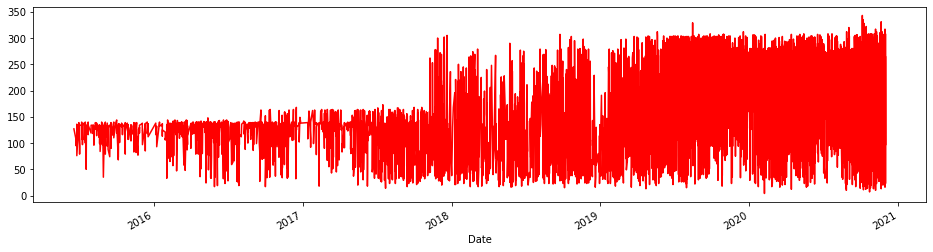

In [107]:
# We create time series for data:
tlen = pd.Series(data=tweets['length'].values, index=tweets['Date'])
tfav= pd.Series(data=tweets['Likes'].values,index=tweets['Date'])
tret= pd.Series(data=tweets['RTs'].values,index=tweets['Date'])
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

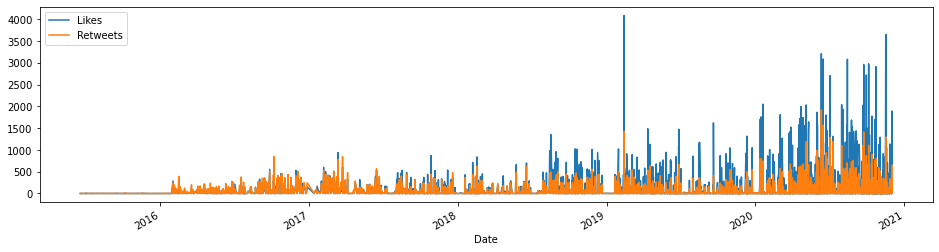

In [108]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# Analysis Sentiments

In [113]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [115]:
# We create a column with the result of the analysis:
tweets['SA'] = np.array([ analize_sentiment(tweet) for tweet in tweets['tweet'] ])

# We display the updated dataframe with the new column:
display(tweets.head(10))

,id,Date,Likes,RTs,tweet,length,SA
0,1331422647054438401,2020-11-25 02:21:10,1,0,i dont even remember if i sent bernie money but i fucking remember sending amy some dough im lik...,124,-1
1,1331422174947774472,2020-11-25 02:19:17,2,0,wally are you being hyperbolicno im a hardcore lefty who donated to amy klobuchar because she do...,277,1
2,1331421339668914178,2020-11-25 02:15:58,2,0,another break from my trademark negativity bidens press conference are boring they contain littl...,268,-1
3,1331375261594611713,2020-11-24 23:12:52,0,0,robbystarbuck realdonaldtrump biden got more votes you do realize that right or are you fucking ...,110,-1
4,1331374771997732869,2020-11-24 23:10:56,1,0,taking a break from my trademark negativity about checks notes well everything biden elevating c...,166,1
5,1330590942676602880,2020-11-22 19:16:16,0,1,the difference between chuck todd and other journalists who are just as crappy is that those oth...,269,-1
6,1330590370275659776,2020-11-22 19:14:00,0,0,chuck retodd is at it again i see,62,0
7,1330192365978578951,2020-11-21 16:52:28,0,0,i know that we being collected under this massive tent thats called the democratic party are use...,278,-1
8,1330191836086988802,2020-11-21 16:50:22,0,0,point taken and i cant say rebeccas point doesnt have its own validity that i cant argue against...,292,1
9,1329574242283884546,2020-11-19 23:56:16,1,0,there are no words to accurately express just how much of a piece of shit she is,107,1


In [116]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(tweets['tweet']) if tweets['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(tweets['tweet']) if tweets['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(tweets['tweet']) if tweets['SA'][index] < 0]

In [126]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(tweets['tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(tweets['tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(tweets['tweet'])))

Percentage of positive tweets: 42.594223318069744%
Percentage of neutral tweets: 36.95843606903839%
Percentage de negative tweets: 20.447340612891864%


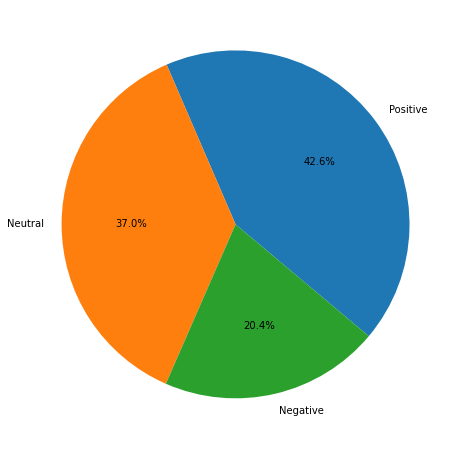

In [134]:
slices_tweets = [format(100*len(pos_tweets)/len(tweets['tweet'])), format(100*len(neu_tweets)/len(tweets['tweet'])), format(100*len(neg_tweets)/len(tweets['tweet']))]
analysis = ['Positive','Neutral', 'Negative']
colors = ['g', 'r', 'y']
plt.figure(figsize=(8, 8))
plt.pie(slices_tweets, labels=analysis, startangle=-40, autopct='%.1f%%')
plt.show()